In [ ]:
%tensorflow_version 2.x
 
from google.colab import files
import numpy as np
import pandas as pd
from numpy import loadtxt
import io
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
 
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
uploaded = files.upload()

Saving BMS_NN_dataset.csv to BMS_NN_dataset.csv


In [ ]:
CSV_COLUMN_NAMES = ['Current', 'Temperature', 'Voltage', 'SoC']
df = pd.read_csv(io.BytesIO(uploaded['BMS_NN_dataset.csv']), names = CSV_COLUMN_NAMES, header = 0)
print(df)
print('----------')
train_data = df.iloc[0:50000,:]   # training inputs
print(train_data)
print('----------')
test_data = df.iloc[50000:,:]     # testing inputs
print(test_data)
print('---------')
y_train = train_data.pop('SoC')   # training output
y_test = test_data.pop('SoC')     # testing output

print(train_data.shape)
print(y_train.shape)
print(test_data.shape)
print(y_test.shape)

        Current  Temperature  Voltage       SoC
0      0.377587         35.0  4.11347  0.922144
1      1.026460         15.0  3.55586  0.391589
2      0.968748         40.0  3.65911  0.489832
3      0.952046         10.0  3.63424  0.466164
4      0.650396         20.0  3.94357  0.760481
...         ...          ...      ...       ...
87496  0.391485         40.0  4.10793  0.916868
87497  0.433579         30.0  4.08639  0.896378
87498  0.227303         30.0  4.16537  0.971524
87499  0.599787         35.0  3.98876  0.803484
87500  1.140680         20.0  3.41835  0.260756

[87501 rows x 4 columns]
----------
        Current  Temperature  Voltage       SoC
0      0.377587         35.0  4.11347  0.922144
1      1.026460         15.0  3.55586  0.391589
2      0.968748         40.0  3.65911  0.489832
3      0.952046         10.0  3.63424  0.466164
4      0.650396         20.0  3.94357  0.760481
...         ...          ...      ...       ...
49995  0.060801         35.0  4.19318  0.997979
499

In [ ]:
model = Sequential()
model.add(Dense(200,input_dim=3,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model.compile(loss='MSE',optimizer='adam', metrics=['MAPE'],)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 41,201
Trainable params: 41,201
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(train_data,y_train,epochs=10,batch_size=32, validation_split = 0.15, validation_freq = 3)

Epoch 1/10
1329/1329 [==============================] - 15s 2ms/step - loss: 0.0189 - MAPE: 18.1758
Epoch 2/10
1329/1329 [==============================] - 2s 2ms/step - loss: 5.5716e-04 - MAPE: 4.1268
Epoch 3/10
1329/1329 [==============================] - 3s 2ms/step - loss: 4.3948e-04 - MAPE: 3.7450 - val_loss: 2.3713e-04 - val_MAPE: 2.7078
Epoch 4/10
1329/1329 [==============================] - 2s 2ms/step - loss: 1.5240e-04 - MAPE: 1.9543
Epoch 5/10
1329/1329 [==============================] - 2s 2ms/step - loss: 5.1642e-05 - MAPE: 1.1619
Epoch 6/10
1329/1329 [==============================] - 3s 2ms/step - loss: 4.5175e-05 - MAPE: 1.1176 - val_loss: 1.3604e-04 - val_MAPE: 1.8964
Epoch 7/10
1329/1329 [==============================] - 2s 2ms/step - loss: 1.2009e-04 - MAPE: 1.5431
Epoch 8/10
1329/1329 [==============================] - 2s 2ms/step - loss: 4.4854e-05 - MAPE: 1.0783
Epoch 9/10
1329/1329 [==============================] - 3s 2ms/step - loss: 5.9309e-05 - MAPE: 1.1974 

In [ ]:
keras.backend.clear_session()

In [ ]:
print(test_data)

        Current  Temperature  Voltage
50000  1.019960         20.0  3.57487
50001  1.026260         25.0  3.57624
50002  0.715206         20.0  3.89083
50003  0.544978         25.0  4.02116
50004  1.157580         40.0  3.42828
...         ...          ...      ...
87496  0.391485         40.0  4.10793
87497  0.433579         30.0  4.08639
87498  0.227303         30.0  4.16537
87499  0.599787         35.0  3.98876
87500  1.140680         20.0  3.41835

[37501 rows x 3 columns]


In [ ]:
model.save('soc_predictor.h5')

In [ ]:
model.predict(input_neural)

ValueError: ignored

In [ ]:
np.savetxt("out_data.csv", out_data, delimiter=",")

In [ ]:
np.savetxt("out_data_original.csv", y_test, delimiter=",")

In [ ]:
test_voltage = test_data.pop('Voltage')
print(test_voltage)

50000    3.57487
50001    3.57624
50002    3.89083
50003    4.02116
50004    3.42828
          ...   
87496    4.10793
87497    4.08639
87498    4.16537
87499    3.98876
87500    3.41835
Name: Voltage, Length: 37501, dtype: float64


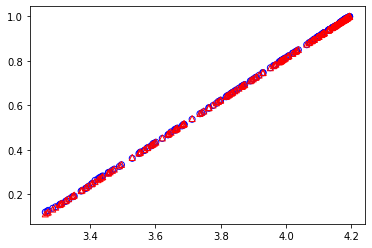

In [ ]:
tv = test_voltage.iloc[0:200]
od = out_data[0:200]
xpoints = tv
ypoints = od

plt.scatter(xpoints,ypoints, marker='o', facecolors='none', edgecolors='b') #plot of predicted data
plt.scatter(xpoints, y_test[0:200], marker='^', facecolors='none', edgecolors='r') #plot of original data
plt.show()